<a href="https://colab.research.google.com/github/mkqcodes/real-estate-listing-analysis/blob/main/nookbook/V1_EDA_Zameen_Listing_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zameen.com Data Analytics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')

In [ ]:
# to see max rows
# pd.set_option('display.max_rows', None)

#to not see max rows
pd.reset_option('display.max_rows')

In [ ]:
# Importing clean data for Google Sheet
# https://docs.google.com/spreadsheets/d/1XK9dG0VwQJBRG_aVOA8soLZc9EmVaZxRQwgSMWMhGv8/export?format=csv
url = "https://docs.google.com/spreadsheets/d/1XK9dG0VwQJBRG_aVOA8soLZc9EmVaZxRQwgSMWMhGv8/export?format=csv"

listings = pd.read_csv(url)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18239 entries, 0 to 18238
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_id            18239 non-null  object 
 1   type                   18239 non-null  object 
 2   property_size          18239 non-null  object 
 3   property_area          18239 non-null  object 
 4   area_sqyd              18239 non-null  float64
 5   price                  18239 non-null  int64  
 6   purpose                18239 non-null  object 
 7   built_in_year          18239 non-null  object 
 8   parking_spaces         9656 non-null   float64
 9   floors                 8366 non-null   float64
 10  bedrooms               17300 non-null  float64
 11  bathrooms              17102 non-null  float64
 12  servant_quarters       9657 non-null   float64
 13  kitchens               13256 non-null  float64
 14  store_rooms            9719 non-null   float64
 15  st

In [ ]:
#  Converting column to datetime format
listings['built_in_year'] = pd.to_datetime(listings['built_in_year'], errors='coerce')

In [ ]:
listings_sale = listings[listings['purpose'] == 'For Sale']
listings_rent = listings[listings['purpose'] == 'For Rent']

# Basic Stats

In [ ]:

total_properties = listings['property_id'].value_counts().sum()
total_sale = listings[listings['purpose'] == 'For Sale']['city'].value_counts().sum()
total_rent = listings[listings['purpose'] == 'For Rent']['city'].value_counts().sum()


top10_sale = listings[listings['purpose'] == 'For Sale']['city'].value_counts().head(10)
top10_rent = listings[listings['purpose'] == 'For Rent']['city'].value_counts().head(10)

print(f'Total Properties: {total_properties}')
print(f'Total Sale Properties: {total_sale}')
print(f'Total Rent Properties: {total_rent}')

print('\nTop 10 Sale Cities:')
print(top10_sale)

print('\nTop 10 Rent Cities:')
print(top10_rent)


Total Properties: 18239
Total Sale Properties: 11126
Total Rent Properties: 7113

Top 10 Sale Cities:
city
Rawalpindi    1248
Karachi       1247
Islamabad     1239
Faisalabad    1238
Lahore        1212
Multan        1210
Gujranwala    1158
Peshawar       856
Sialkot        267
Hyderabad      265
Name: count, dtype: int64

Top 10 Rent Cities:
city
Karachi       1250
Lahore        1248
Rawalpindi    1248
Islamabad     1247
Gujranwala     418
Multan         408
Faisalabad     370
Peshawar       287
Sialkot        220
Jhelum         194
Name: count, dtype: int64


In [ ]:
property_type_count_for_sale = listings[listings['purpose'] == 'For Sale'].groupby('type')['type'].value_counts()
print('Proparty count by type: Purpose sale analysis')
print(property_type_count_for_sale)

Proparty count by type: Purpose sale analysis
type
Farm House         66
Flat             1254
House            9725
Lower Portion      11
Penthouse          13
Room                5
Upper Portion      52
Name: count, dtype: int64


In [ ]:
property_type_count_for_rent = listings[listings['purpose'] == 'For Rent'].groupby('type')['type'].value_counts()
print('Proparty count by type: Purpose rent analysis')
print(property_type_count_for_rent)

Proparty count by type: Purpose rent analysis
type
Farm House         23
Flat             1638
House            3661
Lower Portion     549
Penthouse           9
Room               38
Upper Portion    1195
Name: count, dtype: int64


In [ ]:
rent_tier_count = listings[listings['purpose'] == 'For Rent'].groupby('tier')['city'].value_counts()
print('Proparty count by city and tier: Purpose rent analysis')
print(rent_tier_count)

Proparty count by city and tier: Purpose rent analysis
tier  city           
1.0   Karachi            1250
      Lahore             1248
      Rawalpindi         1248
      Islamabad          1247
      Faisalabad          370
      Peshawar            287
      Hyderabad            66
2.0   Gujranwala          418
      Multan              408
      Sialkot             220
      Bahawalpur           52
      Sheikhupura          15
      Abbottabad           12
      Rahim Yar Khan        3
      Sargodha              3
      Okara                 2
      Dera Ghazi Khan       1
3.0   Jhelum              194
      Murree               15
      Taxila                6
      Mardan                3
      Attock                1
      Nowshera              1
      Sarai Alamgir         1
Name: count, dtype: int64


In [ ]:
sale_tier_count = listings[listings['purpose'] == 'For Sale'].groupby('tier')['city'].value_counts()
print('Proparty count by city and tier: Purpose sale analysis')
print(sale_tier_count)

Proparty count by city and tier: Purpose sale analysis
tier  city            
1.0   Rawalpindi          1248
      Karachi             1247
      Islamabad           1239
      Faisalabad          1238
      Lahore              1212
      Peshawar             856
      Hyderabad            265
      Quetta                 3
2.0   Multan              1210
      Gujranwala          1158
      Sialkot              267
      Bahawalpur           114
      Abbottabad            97
      Rahim Yar Khan        41
      Sheikhupura           38
      Sargodha              36
      Okara                 12
      Dera Ghazi Khan        9
      Kharian                6
      Kasur                  5
      Haripur                4
      Mirpur Khas            2
      Dera Ismail Khan       1
      Jamshoro               1
      Jhang                  1
      Sukkur                 1
      Vehari                 1
3.0   Jhelum               135
      Murree               105
      Taxila           



---



In [ ]:
# Property development of all type throughout the data timeline

property_development = listings[listings['tier'] == 1 ].groupby('built_in_year')['type'].value_counts().sort_values(ascending=False)
property_development.head(20)
# print(property_development)

,,count
built_in_year,type,
2024-01-01,House,4071
2025-01-01,House,1532
2023-01-01,Flat,861
2022-01-01,House,726
2023-01-01,House,666
2024-01-01,Flat,529
2025-01-01,Flat,298
2020-01-01,House,275
2024-01-01,Upper Portion,257


In [ ]:
# Property type available for renting in tier 1 & 2 cities.

property_type_rent = listings[(listings['tier'].isin([1,2]) & (listings['purpose'] == 'For Rent') ) ]['type'].value_counts().sort_values(ascending=False)
property_type_rent

,count
type,
House,3504
Flat,1561
Upper Portion,1178
Lower Portion,540
Room,35
Farm House,23
Penthouse,9


In [ ]:
# Property type available for sale in tier 1 & 2 cities.
property_type_sale = listings[(listings['tier'].isin([1,2]) & (listings['purpose'] == 'For Sale') ) ]['type'].value_counts().sort_values(ascending=False)
property_type_sale

,count
type,
House,8992
Flat,1182
Farm House,57
Upper Portion,52
Penthouse,13
Lower Portion,11
Room,5


In [ ]:
# Development of property in tier 1,2 cities.
# Top 10 years of development
property_built_year_in_tier_1_2 = listings[(listings['tier'].isin([1,2])) ]['built_in_year'].value_counts().sort_values(ascending=False)
property_built_year_in_tier_1_2.head(10)

,count
built_in_year,
2024-01-01,7158
2025-01-01,2925
2023-01-01,2259
2022-01-01,1389
2020-01-01,612
2018-01-01,345
2021-01-01,321
2015-01-01,296
2019-01-01,231


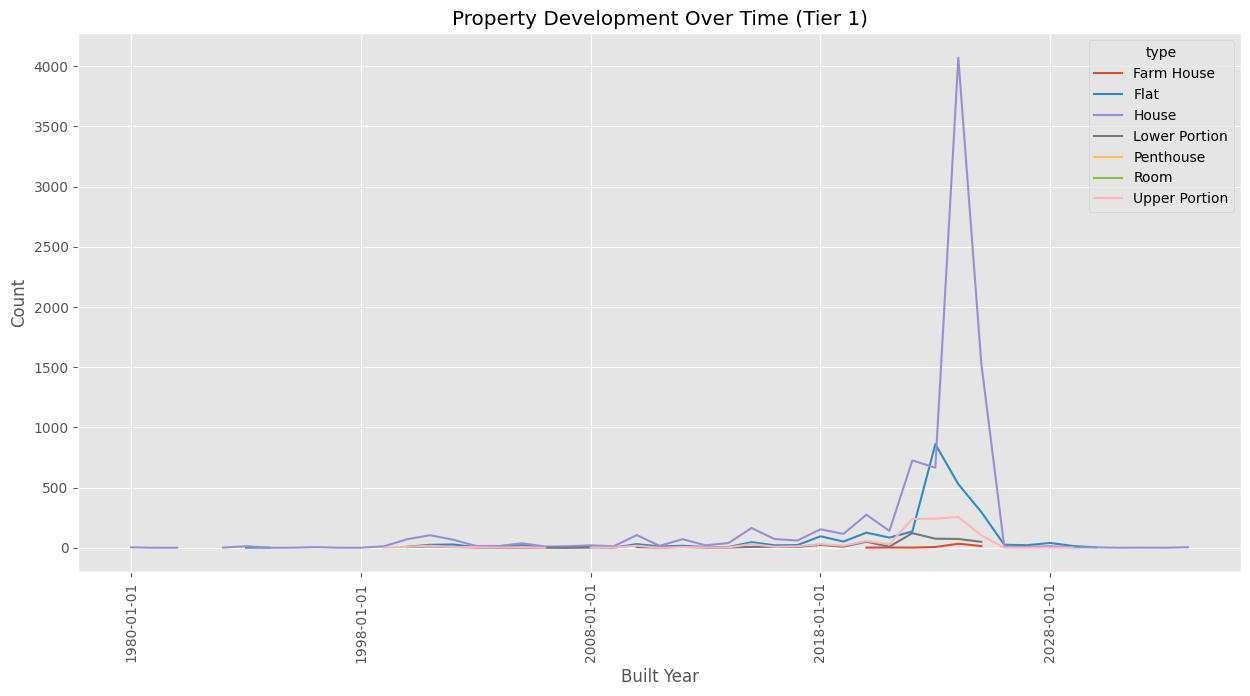

In [ ]:
# Visualization: Development of property in tier 1 cities.

property_development = (
    listings[listings['tier'] == 1]
    .groupby('built_in_year')['type']
    .value_counts()
)

property_development.unstack().plot(kind='line', figsize=(15,7))

plt.title("Property Development Over Time (Tier 1)")
plt.xlabel("Built Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Average Rent in Tier 1 Cities for as per property Size.

In [ ]:
# Median rent in tier 1 cities
tier1_city_median_rent = listings[(listings['tier'] == 1 )  & (listings['purpose'] == 'For Rent')].groupby('proparty_size')['price'].median().sort_values(ascending=True)

# Median sale price in tier 1 cities
tier1_city_median_sale = listings[(listings['tier'] == 1 )  & (listings['purpose'] == 'For Sale')].groupby('proparty_size')['price'].median().sort_values(ascending=True)

print('\nTier 1 City Median Rent:')
print(tier1_city_median_rent)

print('\nTier 1 City Median Sale:')
print(tier1_city_median_sale)


Tier 1 City Median Rent:
proparty_size
Tiny (<100)                 40000.0
Small (100-250)             73000.0
Medium (250-500)           125000.0
Estate (5000+)             200000.0
Large (500-1000)           245000.0
Very Large (1000-2000)     850000.0
Luxury (2000-5000)        2000000.0
Name: price, dtype: float64

Tier 1 City Median Sale:
proparty_size
Tiny (<100)                 8300000.0
Small (100-250)            22000000.0
Medium (250-500)           45000000.0
Large (500-1000)          100000000.0
Very Large (1000-2000)    275000000.0
Estate (5000+)            340000000.0
Luxury (2000-5000)        450000000.0
Name: price, dtype: float64


In [ ]:
# Median rent in tier 1 cities (top 3) (Karachi, Islamabad, Lahore)  by property size

tier1_cities = ['Karachi', 'Lahore', 'Islamabad']

tier1_city_median_rent = (
    listings[
        (listings['city'].isin(tier1_cities)) &
        (listings['purpose'] == 'For Rent')
    ]
    .groupby(['property_size', 'city'])['price']
    .median()
    .sort_values(ascending=True)
)

# Median Sale price in tier 1 cities (top 3) (Karachi, Islamabad, Lahore)  by property size

tier1_city_median_sale = (
    listings[
        (listings['city'].isin(tier1_cities)) &
        (listings['purpose'] == 'For Sale')
    ]
    .groupby(['property_size', 'city'])['price']
    .median()
    .sort_values(ascending=True)
)

print('\nTier 1 City Median Rent:')
print(tier1_city_median_rent)


print('\n\n\n\n')

print('\nTier 1 City Median Sale:')
print(tier1_city_median_sale)



Tier 1 City Median Rent:
property_size           city     
Tiny (<100)             Karachi        35000.0
Estate (5000+)          Lahore         40000.0
Tiny (<100)             Lahore         45000.0
                        Islamabad      60000.0
Small (100-250)         Lahore         80000.0
                        Islamabad      90000.0
                        Karachi        95000.0
Medium (250-500)        Lahore        130000.0
Luxury (2000-5000)      Lahore        132500.0
Medium (250-500)        Islamabad     150000.0
                        Karachi       190000.0
Estate (5000+)          Islamabad     200000.0
Large (500-1000)        Lahore        250000.0
                        Islamabad     280000.0
                        Karachi       350000.0
Very Large (1000-2000)  Lahore        599500.0
Estate (5000+)          Karachi      1000000.0
Very Large (1000-2000)  Karachi      1000000.0
                        Islamabad    1600000.0
Luxury (2000-5000)      Islamabad    1850000.0


In [ ]:
# Median Rent price by property size

listings_rent.groupby('property_size')['property_id'].count().sort_values(ascending=False)

,property_id
property_size,
Small (100-250),2612
Medium (250-500),1942
Large (500-1000),1626
Tiny (<100),575
Very Large (1000-2000),283
Luxury (2000-5000),65
Estate (5000+),10


In [ ]:
# Median Sale price by property size

listings_sale.groupby('property_size')['property_id'].count().sort_values(ascending=False)


,property_id
property_size,
Small (100-250),5466
Medium (250-500),2945
Large (500-1000),1492
Tiny (<100),846
Very Large (1000-2000),272
Luxury (2000-5000),84
Estate (5000+),21


In [ ]:
# Adding Bedrooms vs bathroom ratio.

listings['bb_ratio'] = listings['bedrooms'] / listings['bathrooms']

In [ ]:
listings[['bb_ratio', 'bathrooms', 'bedrooms']].sample(20)

,bb_ratio,bathrooms,bedrooms
5537,0.833333,6.0,5.0
4818,1.000000,6.0,6.0
9177,1.000000,1.0,1.0
16233,0.833333,6.0,5.0
2530,0.833333,6.0,5.0
17567,0.750000,4.0,3.0
14328,1.500000,2.0,3.0
5002,0.833333,6.0,5.0
14313,0.833333,6.0,5.0
5003,0.750000,4.0,3.0


In [ ]:
# bb_ratio (less then 1) indicates well planed properties, It might indicate the modren design availablities of facilities around the house.
listings[(listings['bb_ratio'] > 0 )  & (listings['bb_ratio'] < 1) ][['bb_ratio', 'bedrooms', 'bathrooms']]

,bb_ratio,bedrooms,bathrooms
1,0.666667,2.0,3.0
2,0.500000,1.0,2.0
3,0.500000,1.0,2.0
10,0.666667,2.0,3.0
11,0.666667,2.0,3.0
...,...,...,...
18202,0.750000,3.0,4.0
18210,0.800000,4.0,5.0
18211,0.833333,5.0,6.0
18217,0.833333,5.0,6.0


# Visualizations

In [ ]:
# Defining the plot color scheme
plt.style.use('seaborn-v0_8-pastel')

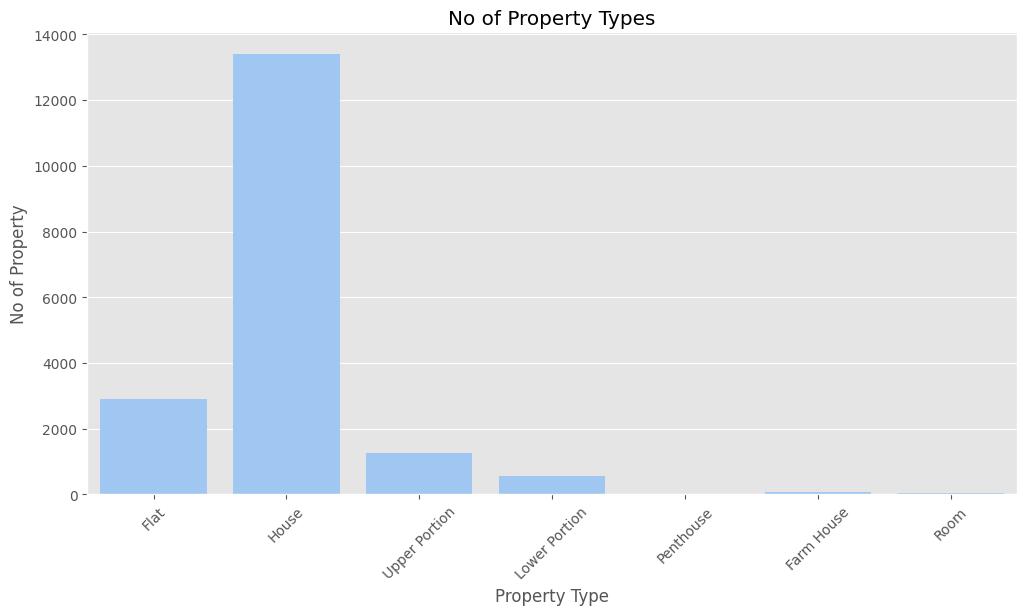

In [ ]:
# Visualization: No of Properties in each property type


plt.figure(figsize=(12,6))
sns.countplot(data=listings, x='type')
plt.title("No of Property Types")
plt.xticks(rotation=45)

plt.xlabel("Property Type")
plt.ylabel("No of Property")


plt.show()

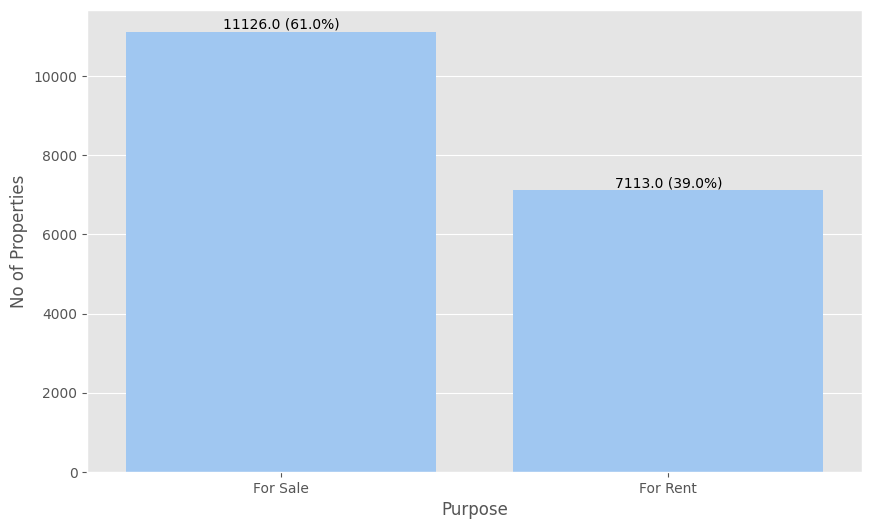

In [ ]:
# Visualization: No of Properties available for Sale or Rent

plt.figure(figsize=(10,6))
ax = sns.countplot(data=listings, x='purpose')

# Adding count & percent on bars
total = len(listings)

for p in ax.patches:
    height = p.get_height()           # count value
    pct = (height / total) * 100      # % value
    x = p.get_x() + p.get_width() / 2 # bar center

    ax.annotate(
        f'{height} ({pct:.1f}%)',    # label format: count (percent)
        (x, height),
        ha='center', va='bottom'
    )

plt.xlabel("Purpose")
plt.ylabel("No of Properties")
# plt.title("No of Properties available for Sale or Rent")
plt.show()

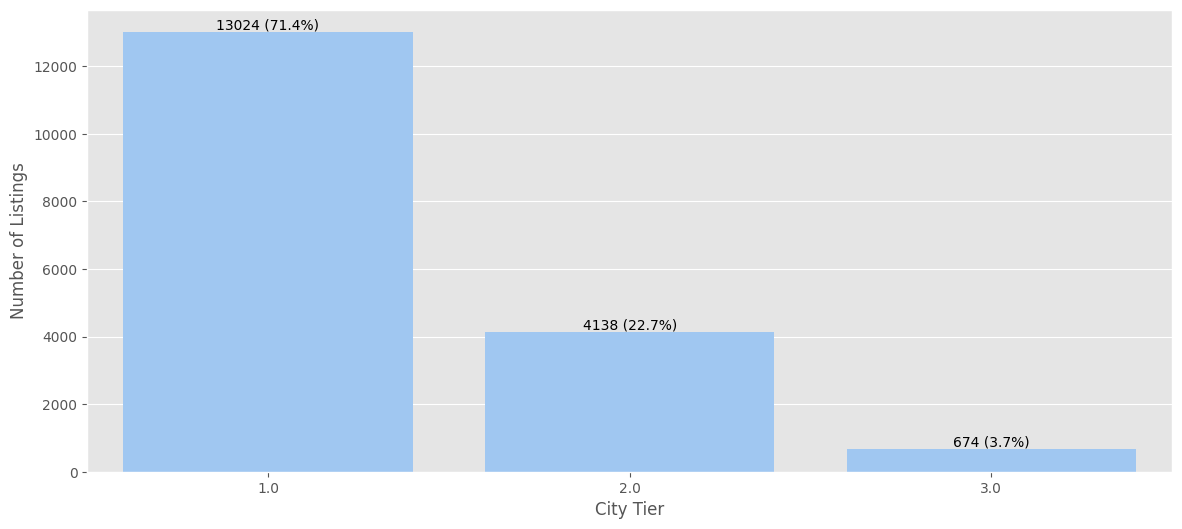

In [ ]:
# Visualization: No of Properties available in each city tier

plt.figure(figsize=(14,6))
ax = sns.countplot(
    data=listings,
    x='tier',
    order=listings['tier'].value_counts().index
)

# plt.title("No of properties available in each city tier")
plt.xticks(rotation=0)
plt.xlabel("City Tier")
plt.ylabel("Number of Listings")

# --- Add percentage labels ---
total = len(listings)

for p in ax.patches:
    height = p.get_height()
    pct = (height / total) * 100
    ax.annotate(f'{int(height)} ({pct:.1f}%)',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

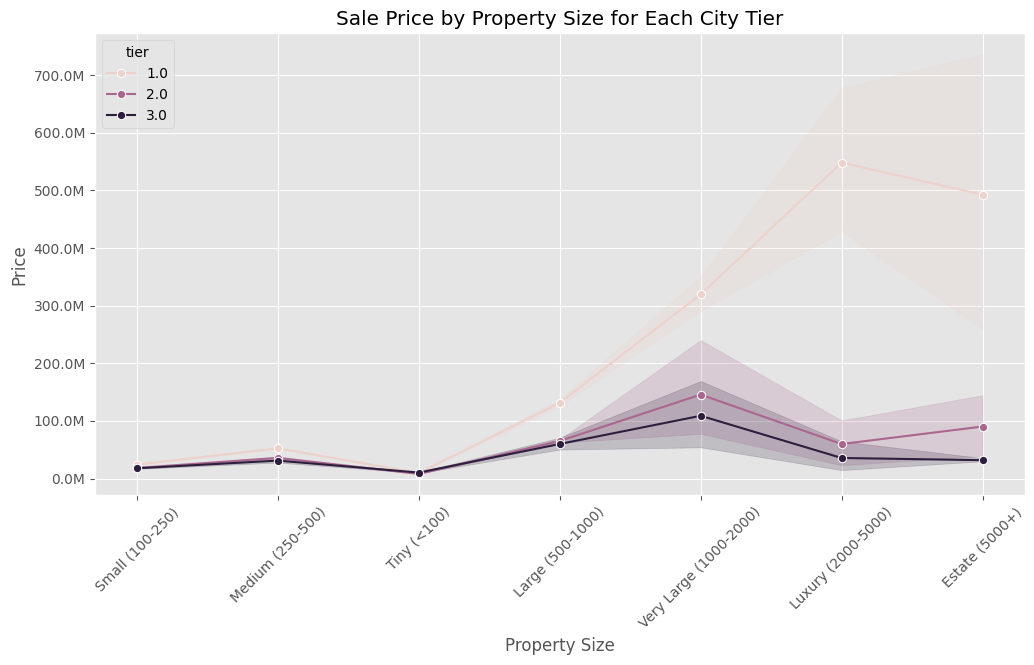

In [ ]:
# Property pricing in all tiers available for sale

plt.figure(figsize=(12,6))
sns.lineplot(data=listings_sale, x='property_size', y='price', hue='tier', marker='o')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

plt.title("Sale Price by Property Size for Each City Tier")
plt.xlabel("Property Size")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

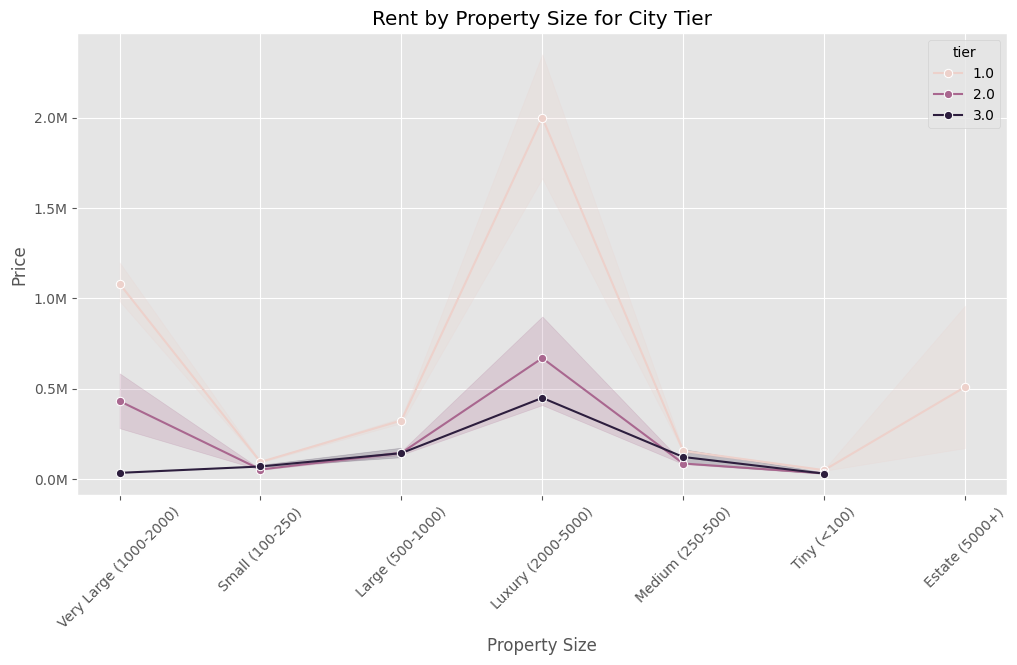

In [ ]:
# Visualization: Property rent in all city tiers

plt.figure(figsize=(12,6))
sns.lineplot(data=listings_rent, x='property_size', y='price', hue='tier', marker='o')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

plt.title("Rent by Property Size for City Tier")
plt.xlabel("Property Size")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:

# Median rent in tier 1 cities
avg_price_tier_1_for_rent = (
    listings[
        (listings['tier'] == 1) &
        (listings['purpose'] == 'For Rent')
    ]
    .groupby(['city', 'property_size'])
    .agg(
        median_price=('price', 'median'),
        count=('city', 'count'),
        avg_population=('population', 'median'),
        avg_income=('median_monthly_income', 'median')
    )
    .sort_values(by='city', ascending=True)
    .reset_index()
)
avg_price_tier_1_for_rent

,city,property_size,median_price,count,avg_population,avg_income
0,Faisalabad,Estate (5000+),1200000.0,1,9080000.0,75000.0
1,Faisalabad,Large (500-1000),197500.0,42,9080000.0,75000.0
2,Faisalabad,Luxury (2000-5000),1150000.0,2,9080000.0,75000.0
3,Faisalabad,Medium (250-500),90000.0,124,9080000.0,75000.0
4,Faisalabad,Small (100-250),55000.0,148,9080000.0,75000.0
5,Faisalabad,Tiny (<100),35000.0,48,9080000.0,75000.0
6,Faisalabad,Very Large (1000-2000),575000.0,5,9080000.0,75000.0
7,Hyderabad,Very Large (1000-2000),400000.0,1,2430000.0,55000.0
8,Hyderabad,Small (100-250),56500.0,48,2430000.0,55000.0
9,Hyderabad,Tiny (<100),23000.0,4,2430000.0,55000.0


In [ ]:
# Median Sale price in tier 1 cities

avg_price_tier_1_for_sale = (
    listings[
        (listings['tier'] == 1) &
        (listings['purpose'] == 'For Sale')
    ]
    .groupby(['city', 'property_size'])
    .agg(
        median_price=('price', 'median'),
        count=('city', 'count'),
        avg_population=('population', 'mean')
    )
    .sort_values(by='count', ascending=False)
    .reset_index()
)
avg_price_tier_1_for_sale

,city,property_size,median_price,count,avg_population
0,Karachi,Small (100-250),24500000.0,714,20300000.0
1,Faisalabad,Small (100-250),20000000.0,687,9080000.0
2,Rawalpindi,Small (100-250),18500000.0,499,6120000.0
3,Islamabad,Small (100-250),26200000.0,482,2360000.0
4,Rawalpindi,Medium (250-500),45000000.0,467,6120000.0
5,Lahore,Small (100-250),20000000.0,457,13980000.0
6,Peshawar,Small (100-250),23000000.0,439,2410000.0
7,Islamabad,Medium (250-500),53000000.0,332,2360000.0
8,Lahore,Medium (250-500),40000000.0,265,13980000.0
9,Islamabad,Large (500-1000),149000000.0,262,2360000.0


In [ ]:
# Visualization (interactive): Median rent in tier 1 cities
px.bar(
    avg_price_tier_1_for_sale,
    x='property_size',
    y='median_price',
    color='city',
    barmode='group',
    # title="Average Property Price by Size in Tier-1 Cities",
    labels={'property_size': 'Property Size', 'median_price': 'Average Price', 'population' : 'Population'},
    height=700,
    width=1600
)

In [ ]:
# Visualization (interactive): Median sale price in tier 1 cities


px.bar(
    avg_price_tier_1_for_rent,
    x='property_size',
    y='count',
    color='city',
    barmode='group',
    # title="Average Property Price by Size in Tier-1 Cities",
    labels={'property_size': 'Property Size', 'count': 'No of Proparties', 'population' : 'Population'},
    height=900,
)

In [ ]:
# Property built in last ten year in tier 1 cities
property_built_between_year = listings[(listings['built_in_year'].notna()) & (listings['tier'] == 1)  & (listings['built_in_year'] >= '2016-01-01') & (listings['built_in_year'] <= '2026-01-01')  ]

built_over_time = (
    property_built_between_year
    .groupby(['built_in_year', 'property_size'])
    .size()
    .reset_index(name='count')
    .sort_values('built_in_year')
)

built_over_time
# property_built_between_year['property_id'].value_counts().sum()


,built_in_year,property_size,count
0,2016-01-01,Large (500-1000),21
1,2016-01-01,Luxury (2000-5000),1
2,2016-01-01,Medium (250-500),29
3,2016-01-01,Small (100-250),45
4,2016-01-01,Tiny (<100),8
5,2016-01-01,Very Large (1000-2000),8
6,2017-01-01,Large (500-1000),25
7,2017-01-01,Luxury (2000-5000),3
8,2017-01-01,Medium (250-500),24
9,2017-01-01,Small (100-250),43


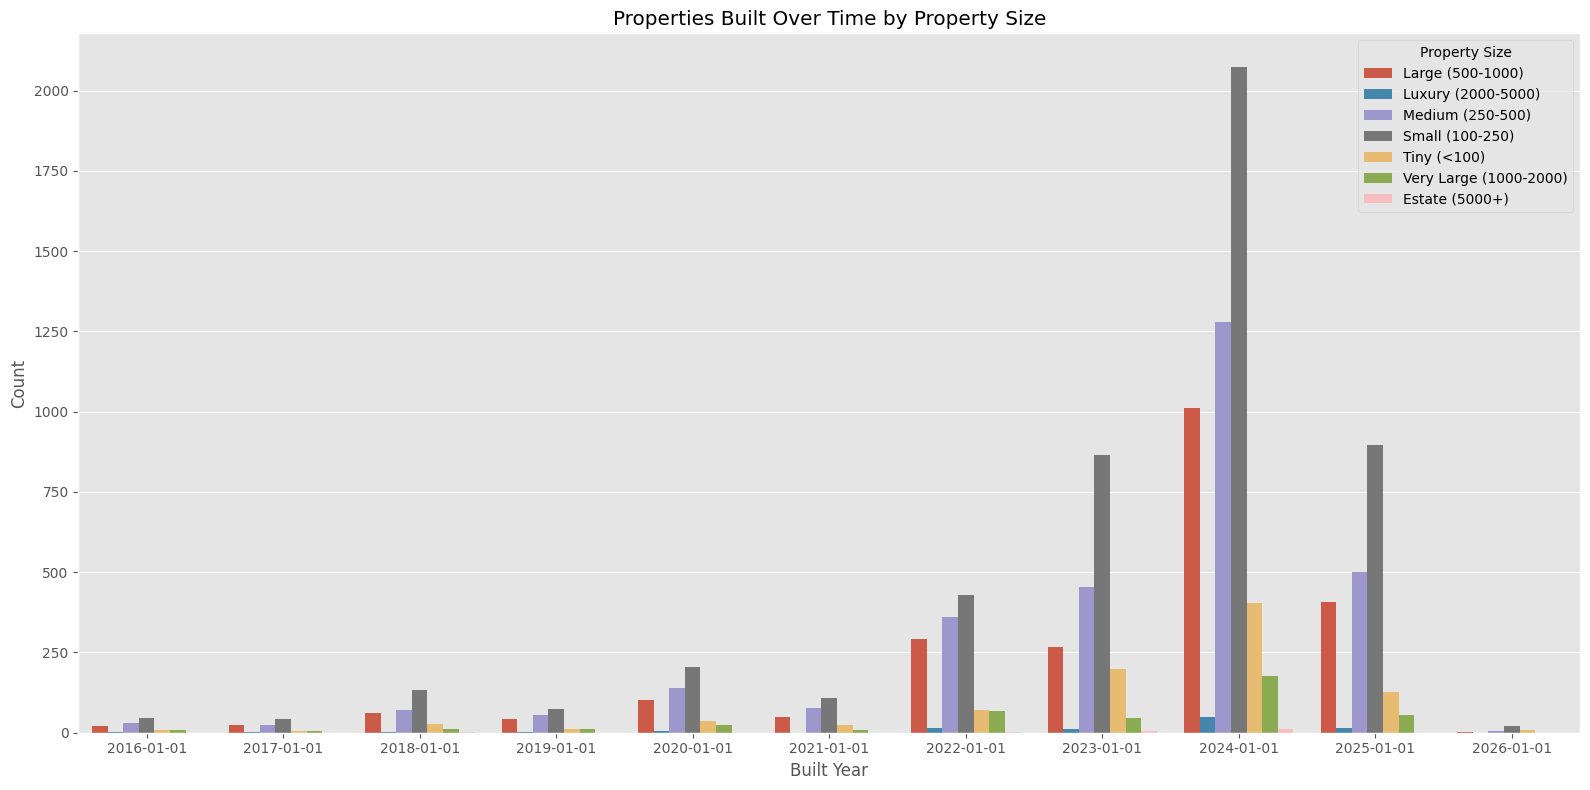

In [ ]:
# Visualization : Property built in last ten year in tier 1 cities in each property type
plt.figure(figsize=(16,8))

sns.barplot(
    data=built_over_time,
    x='built_in_year',
    y='count',
    hue='property_size'
)

plt.title("Properties Built Over Time by Property Size")
plt.xlabel("Built Year")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Property Size")
plt.tight_layout()
plt.show()

# Market Overview

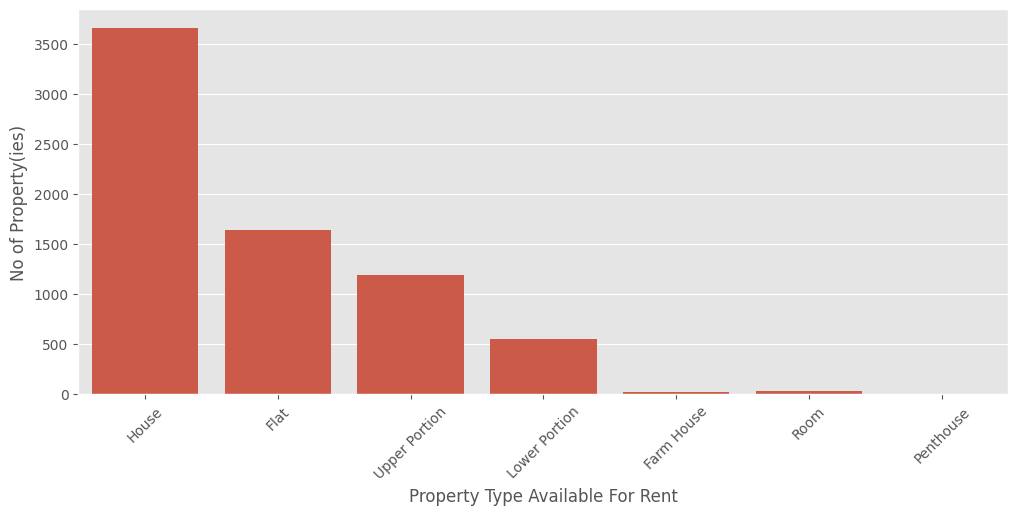

In [ ]:
# Visualization : Properties available for rent in each type

plt.figure(figsize=(12,5))
sns.countplot(data=listings_rent, x='type', order=listings['type'].value_counts().index)
plt.xticks(rotation=45)
# plt.title("No Property Types")
plt.xlabel("Property Type Available For Rent")
plt.ylabel("No of Property(ies)")
plt.show()

In [ ]:
#  Value reference for properties in each type available for rent
listings_rent.groupby('type')['type'].value_counts().sort_values(ascending=False)

,count
type,
House,3661
Flat,1638
Upper Portion,1195
Lower Portion,549
Room,38
Farm House,23
Penthouse,9


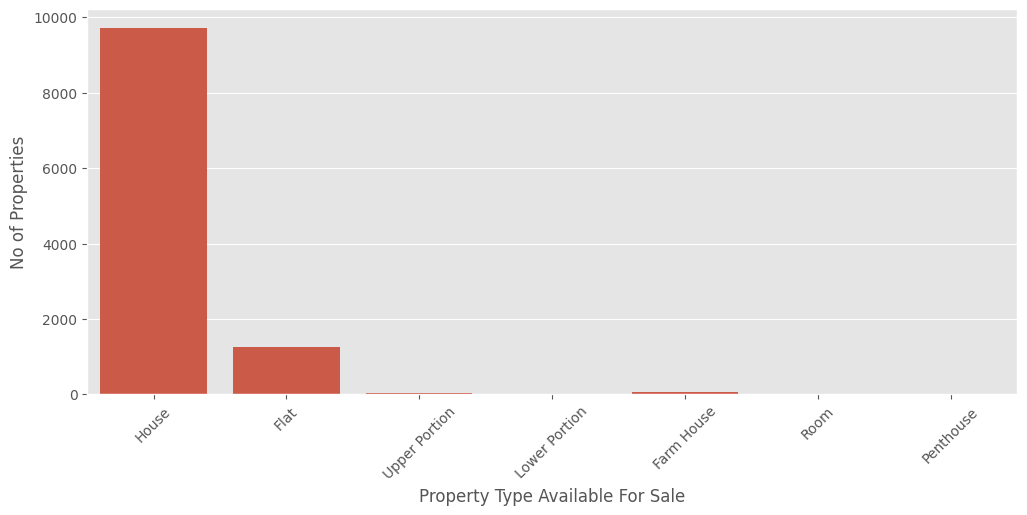

In [ ]:
# Visualization : Properties available for sale in each type


plt.figure(figsize=(12,5))
sns.countplot(data=listings_sale, x='type', order=listings['type'].value_counts().index)
plt.xticks(rotation=45)

plt.xlabel("Property Type Available For Sale")
plt.ylabel("No of Properties")
plt.show()


In [ ]:
#  Value reference for properties in each type available for sale
listings_sale.groupby('type')['type'].value_counts().sort_values(ascending=False)

,count
type,
House,9725
Flat,1254
Farm House,66
Upper Portion,52
Penthouse,13
Lower Portion,11
Room,5


In [ ]:
listings_for_rent.groupby('property_size')['type'].value_counts()

property_size           type         
Estate (5000+)          Farm House          4
                        House               3
                        Lower Portion       1
                        Penthouse           1
                        Upper Portion       1
Large (500-1000)        House            1007
                        Upper Portion     481
                        Lower Portion     126
                        Flat                5
                        Farm House          3
                        Penthouse           3
                        Room                1
Luxury (2000-5000)      House              50
                        Farm House         10
                        Flat                3
                        Lower Portion       1
                        Upper Portion       1
Medium (250-500)        House            1043
                        Upper Portion     404
                        Flat              275
                        Lower Portion     212
                        Penthouse           4
                        Room                3
                        Farm House          1
Small (100-250)         House            1243
                        Flat              884
                        Upper Portion     286
                        Lower Portion     192
                        Room                5
                        Farm House          2
Tiny (<100)             Flat              468
                        House              62
                        Room               29
                        Lower Portion      10
                        Upper Portion       6
Very Large (1000-2000)  House             253
                        Upper Portion      16
                        Lower Portion       7
                        Farm House          3
                        Flat                3
                        Penthouse           1
Name: count, dtype: int64

In [ ]:
bar_chart = listings_for_rent.groupby(['property_size', 'type']).size().reset_index(name='count')
pivot_for_rent = bar_chart.pivot(
    index='property_size',
    columns='type',
    values='count'
).fillna(0)


<Figure size 1000x500 with 0 Axes>

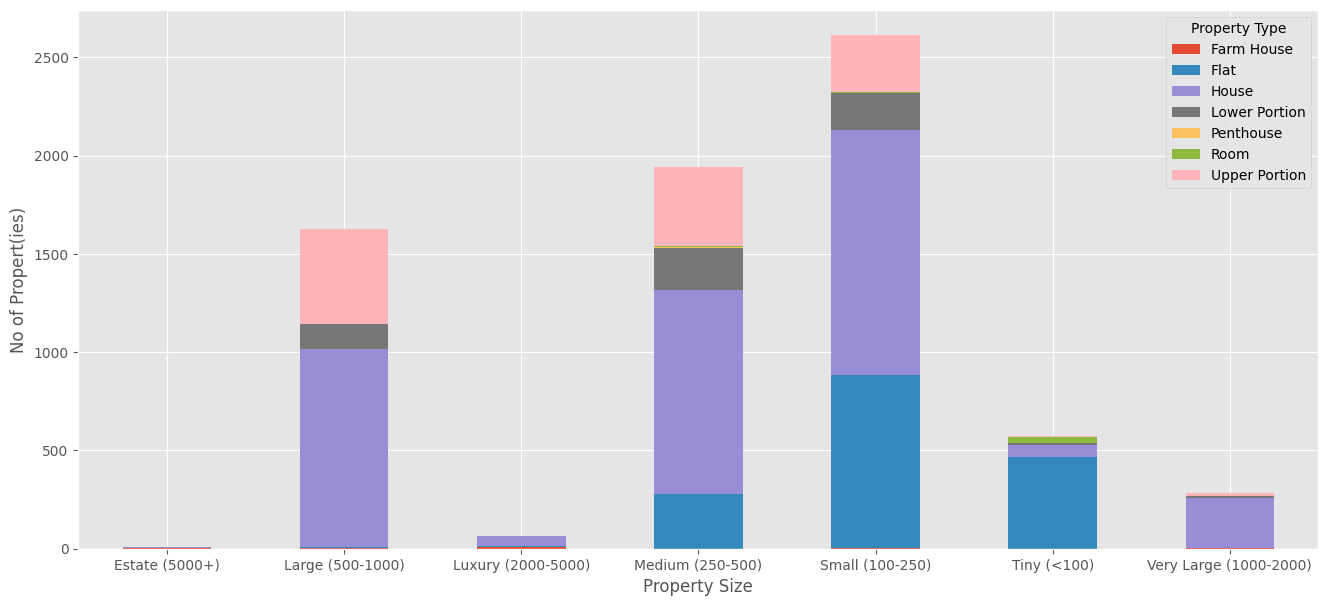

In [ ]:
# Visualization: Stack chart for property size and property type
plt.figure(figsize=(10,5))
pivot_for_rent.plot(
    kind='bar',
    stacked=True,
    figsize=(16,7)
)

# plt.title("Property Type Distribution by Size")
plt.xlabel("Property Size")
plt.ylabel("No of Propert(ies)")
plt.xticks(rotation=0)
plt.legend(title="Property Type")
plt.show()

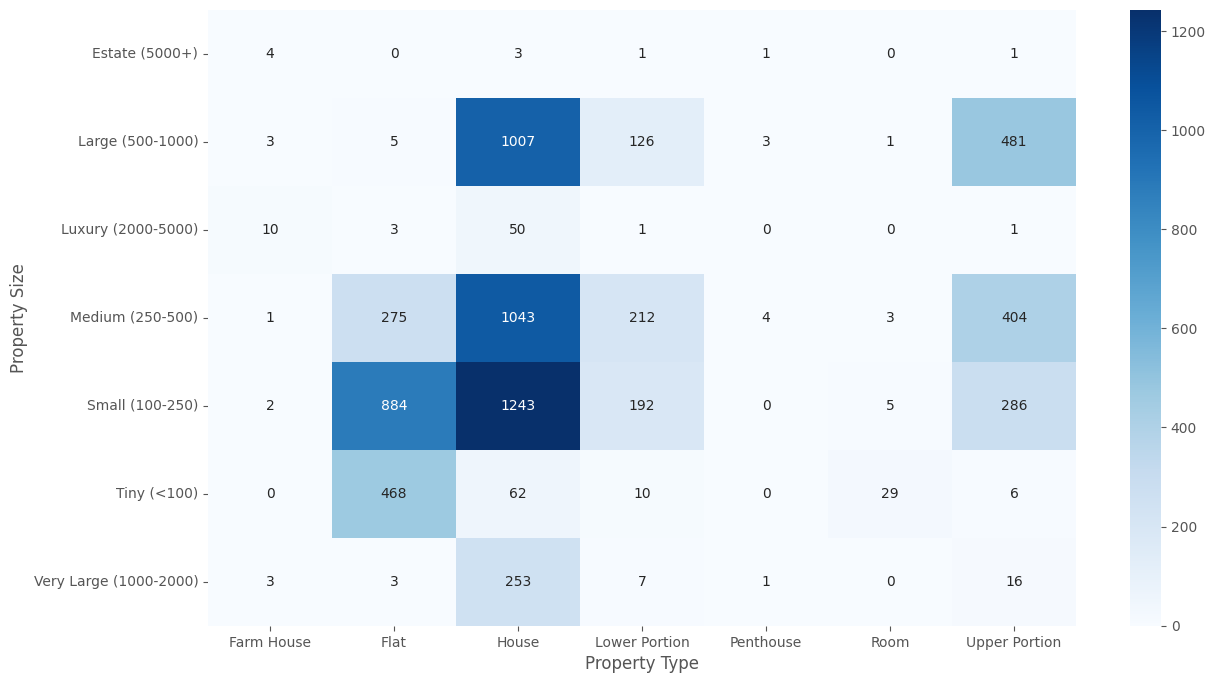

In [ ]:
# Visualization: Histogram for Property Size vs Property Type available for rent (Property Count)
plt.figure(figsize=(14,8))
sns.heatmap(
    pivot_for_rent,
    annot=True,
    fmt=".0f",
    cmap="Blues"
)

# plt.title("Property Type vs Property Size")
plt.xlabel("Property Type")
plt.ylabel("Property Size")
plt.show()

In [ ]:
# Ploted value for reference
pivot_for_rent

type,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
property_size,,,,,,,
Estate (5000+),4.0,0.0,3.0,1.0,1.0,0.0,1.0
Large (500-1000),3.0,5.0,1007.0,126.0,3.0,1.0,481.0
Luxury (2000-5000),10.0,3.0,50.0,1.0,0.0,0.0,1.0
Medium (250-500),1.0,275.0,1043.0,212.0,4.0,3.0,404.0
Small (100-250),2.0,884.0,1243.0,192.0,0.0,5.0,286.0
Tiny (<100),0.0,468.0,62.0,10.0,0.0,29.0,6.0
Very Large (1000-2000),3.0,3.0,253.0,7.0,1.0,0.0,16.0


In [ ]:


bar_chart_sale = listings_for_rent.groupby(['property_size', 'type']).size().reset_index(name='count')
pivot_for_sale = bar_chart_sale.pivot(
    index='property_size',
    columns='type',
    values='count'
).fillna(0)

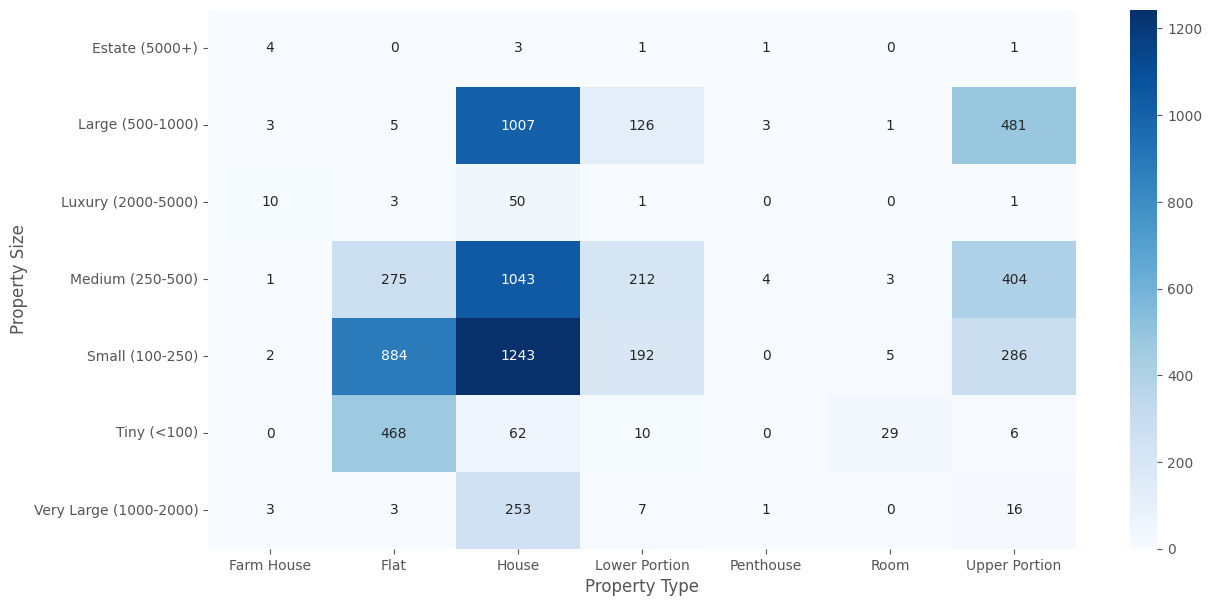

In [ ]:
# Visualization: Histogram for Property Size vs Property Type available for sale (Property Count)

plt.figure(figsize=(14,7))
sns.heatmap(
    pivot_for_sale,
    annot=True,
    fmt=".0f",
    cmap="Blues"
)

# plt.title("Property Type vs Property Size")
plt.xlabel("Property Type")
plt.ylabel("Property Size")
plt.show()

In [ ]:
# Ploted value for reference
pivot_for_sale

type,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
property_size,,,,,,,
Estate (5000+),4.0,0.0,3.0,1.0,1.0,0.0,1.0
Large (500-1000),3.0,5.0,1007.0,126.0,3.0,1.0,481.0
Luxury (2000-5000),10.0,3.0,50.0,1.0,0.0,0.0,1.0
Medium (250-500),1.0,275.0,1043.0,212.0,4.0,3.0,404.0
Small (100-250),2.0,884.0,1243.0,192.0,0.0,5.0,286.0
Tiny (<100),0.0,468.0,62.0,10.0,0.0,29.0,6.0
Very Large (1000-2000),3.0,3.0,253.0,7.0,1.0,0.0,16.0


# Price Analysis For Rent and Sale

In [ ]:
listings['property_size'].unique().tolist()

['Small (100-250)',
 'Medium (250-500)',
 'Tiny (<100)',
 'Large (500-1000)',
 'Very Large (1000-2000)',
 'Luxury (2000-5000)',
 'Estate (5000+)']

In [ ]:
# Property Sort as per Size
size_order = [
    'Tiny (<100)',
    'Small (100-250)',
    'Medium (250-500)',
    'Large (500-1000)',
    'Very Large (1000-2000)',
    'Luxury (2000-5000)',
    'Estate (5000+)'
]

In [ ]:
# Group and reset index
property_price_rent = listings_for_rent.groupby(['property_size', 'type'])['price'].median().reset_index()

# Convert 'property_size' to categorical with the desired order
property_price_rent['property_size'] = pd.Categorical(property_price_rent['property_size'],
                                                 categories=size_order,
                                                 ordered=True)

# Now, when you pivot or sort, it will follow this order
property_price_rent = property_price_rent.sort_values('property_size')

property_price_rent.reset_index()


,index,property_size,type,price
0,32,Tiny (<100),Lower Portion,26000.0
1,30,Tiny (<100),Flat,40000.0
2,31,Tiny (<100),House,35000.0
3,33,Tiny (<100),Room,17000.0
4,34,Tiny (<100),Upper Portion,22750.0
5,26,Small (100-250),House,65000.0
6,25,Small (100-250),Flat,90000.0
7,24,Small (100-250),Farm House,32500.0
8,29,Small (100-250),Upper Portion,42000.0
9,27,Small (100-250),Lower Portion,43500.0


In [ ]:
price_for_rent = property_price_rent.pivot(
    index='property_size',
    columns='type',
    values='price'
).fillna(0)
price_for_rent

type,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
property_size,,,,,,,
Tiny (<100),0.0,40000.0,35000.0,26000.0,0.0,17000.0,22750.0
Small (100-250),32500.0,90000.0,65000.0,43500.0,0.0,18000.0,42000.0
Medium (250-500),120000.0,195000.0,120000.0,80000.0,650000.0,35000.0,62000.0
Large (500-1000),30000.0,690000.0,300000.0,150000.0,600000.0,11900.0,110000.0
Very Large (1000-2000),20000.0,110000.0,900000.0,350000.0,2700000.0,0.0,255000.0
Luxury (2000-5000),215000.0,220000.0,2150000.0,560000.0,0.0,0.0,400000.0
Estate (5000+),40000.0,0.0,250000.0,200000.0,1000000.0,0.0,140000.0


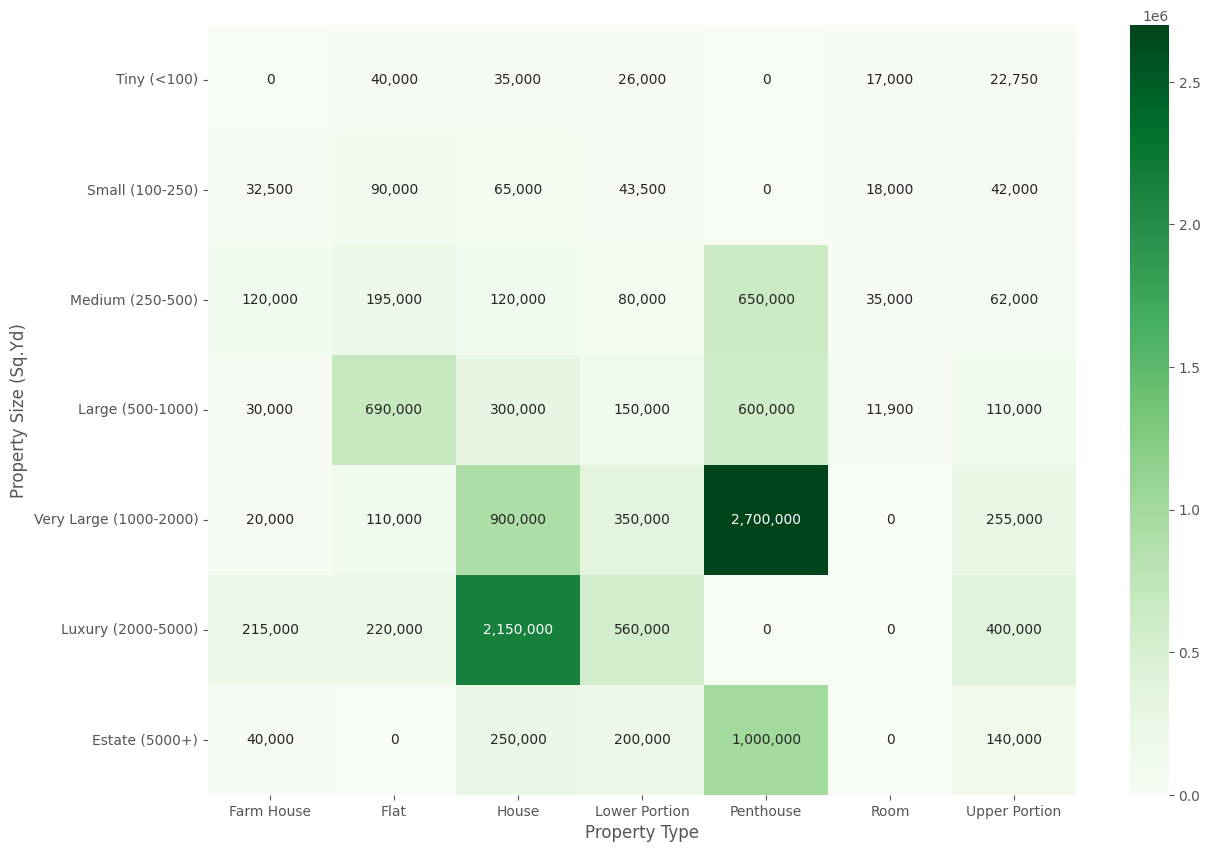

In [ ]:
# Visualization: Histogram for Property Size vs Property Type available for rent (Property Price)

# Create a formatted version for annotations
annot_labels = price_for_rent.map(lambda x: f"{int(x):,}")

plt.figure(figsize=(14,10))
ax = sns.heatmap(
    price_for_rent,
    annot=annot_labels,   # use formatted strings
    fmt="",               # leave empty since we provide strings
    cmap="Greens"
)
# ax.set(xlabel=None, ylabel=None)   # remove both labels

plt.xlabel("Property Type")
plt.ylabel("Property Size (Sq.Yd)")
# plt.title("Median Price by Property Size & Type")
plt.show()

Property Rent

In [ ]:
# Group and reset index
property_sale_price = listings_for_sale.groupby(['property_size', 'type'])['price'].median().reset_index()

# Convert 'property_size' to categorical with the desired order
property_sale_price['property_size'] = pd.Categorical(property_sale_price['property_size'],
                                                 categories=size_order,
                                                 ordered=True)

# Now, when you pivot or sort, it will follow this order
property_sale_price = property_sale_price.sort_values('property_size')

property_sale_price.reset_index()

,index,property_size,type,price
0,22,Tiny (<100),Flat,7000000.0
1,23,Tiny (<100),House,9500000.0
2,24,Tiny (<100),Room,3200000.0
3,25,Tiny (<100),Upper Portion,7300000.0
4,18,Small (100-250),House,19500000.0
5,17,Small (100-250),Flat,19000000.0
6,21,Small (100-250),Upper Portion,25000000.0
7,19,Small (100-250),Lower Portion,26500000.0
8,20,Small (100-250),Penthouse,17500000.0
9,11,Medium (250-500),Farm House,34250000.0


In [ ]:
price_for_sale = property_sale_price.pivot(
    index='property_size',
    columns='type',
    values='price'
).fillna(0)
price_for_rent

type,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
property_size,,,,,,,
Tiny (<100),0.0,40000.0,35000.0,26000.0,0.0,17000.0,22750.0
Small (100-250),32500.0,90000.0,65000.0,43500.0,0.0,18000.0,42000.0
Medium (250-500),120000.0,195000.0,120000.0,80000.0,650000.0,35000.0,62000.0
Large (500-1000),30000.0,690000.0,300000.0,150000.0,600000.0,11900.0,110000.0
Very Large (1000-2000),20000.0,110000.0,900000.0,350000.0,2700000.0,0.0,255000.0
Luxury (2000-5000),215000.0,220000.0,2150000.0,560000.0,0.0,0.0,400000.0
Estate (5000+),40000.0,0.0,250000.0,200000.0,1000000.0,0.0,140000.0


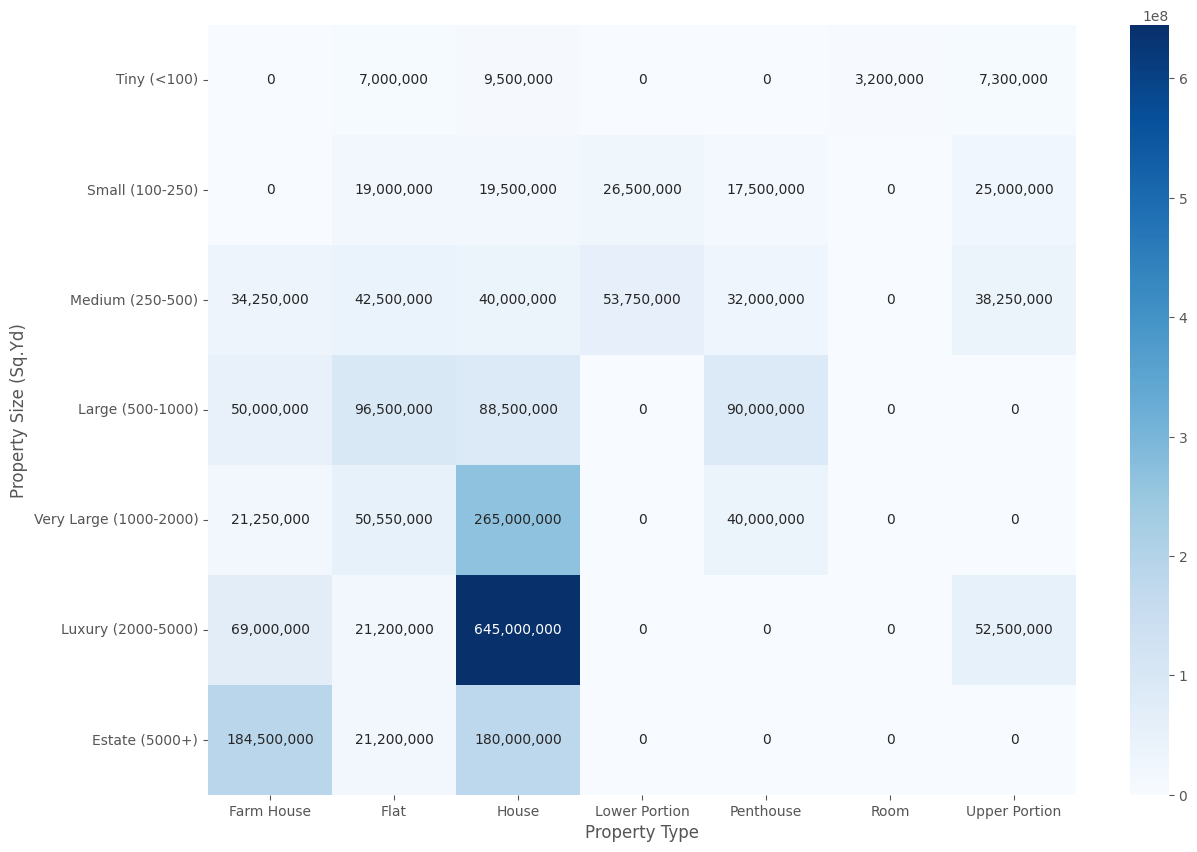

In [ ]:
# Visualization: Histogram for Property Size vs Property Type available for sale (Property Price)

# Create a formatted version for annotations
annot_labels = price_for_sale.map(lambda x: f"{int(x):,}")

plt.figure(figsize=(14,10))
ax = sns.heatmap(
    price_for_sale,
    annot=annot_labels,   # use formatted strings
    fmt="",               # leave empty since we provide strings
    cmap="Blues"
)
# ax.set(xlabel=None, ylabel=None)   # remove both labels

plt.xlabel("Property Type")
plt.ylabel("Property Size (Sq.Yd)")
# plt.title("Median Price by Property Size & Type")
plt.show()